In [ ]:
#install packages

In [ ]:
pip install numpy

In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\anaconda3

  added / updated specs:
    - matplotlib


The following packages will be UPDATED:

  certifi                          2023.5.7-py310haa95532_0 --> 2023.7.22-py310haa95532_0 





Preparing transaction: ...working... done
Verifying transaction: ...working... failed




==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.7.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.0



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\anaconda3




In [ ]:
pip install statsmodels

In [ ]:
pip install patsy

In [ ]:
#Import packages

In [4]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [10]:
from statsmodels.api import OLS

In [12]:
import statsmodels.api as sm

In [14]:
import patsy

In [15]:
from patsy import dmatrices

In [16]:
#Import Data

In [17]:
Cars_Data=pd.read_csv('C:\\Users\\Andrew\\Desktop\\Job Search\\Projects\\Cars.csv')

In [18]:
Cars_Data.head()

,name,sports_car,suv,wagon,minivan,pickup,all_wheel,rear_wheel,msrp,dealer_cost,eng_size,ncyl,horsepwr,city_mpg,hwy_mpg,weight,wheel_base,length,width
0,Chevrolet Aveo 4dr,False,False,False,False,False,False,False,11690,10965,1.6,4,103,28.0,34.0,2370.0,98.0,167.0,66.0
1,Chevrolet Aveo LS 4dr hatch,False,False,False,False,False,False,False,12585,11802,1.6,4,103,28.0,34.0,2348.0,98.0,153.0,66.0
2,Chevrolet Cavalier 2dr,False,False,False,False,False,False,False,14610,13697,2.2,4,140,26.0,37.0,2617.0,104.0,183.0,69.0
3,Chevrolet Cavalier 4dr,False,False,False,False,False,False,False,14810,13884,2.2,4,140,26.0,37.0,2676.0,104.0,183.0,68.0
4,Chevrolet Cavalier LS 2dr,False,False,False,False,False,False,False,16385,15357,2.2,4,140,26.0,37.0,2617.0,104.0,183.0,69.0


In [19]:
#Data Exploration

In [20]:
#msrp

In [21]:
Cars_Data['msrp'].mean()

32774.85514018692

In [22]:
Cars_Data['msrp'].max()

192465

In [23]:
Cars_Data['msrp'].min()

10280

In [24]:
Cars_Data['msrp'].std()

19431.71667371752

In [25]:
Cars_Data['msrp'].count()

428

In [26]:
#msrp by car type

In [27]:
Cars_Data.groupby('sports_car')['msrp'].mean()

sports_car
False    30109.952507
True     53387.061224
Name: msrp, dtype: float64

In [28]:
Cars_Data.groupby('suv')['msrp'].mean()

suv
False    32446.258152
True     34790.250000
Name: msrp, dtype: float64

In [29]:
Cars_Data.groupby('wagon')['msrp'].mean()

wagon
False    33071.412060
True     28840.533333
Name: msrp, dtype: float64

In [30]:
Cars_Data.groupby('minivan')['msrp'].mean()

minivan
False    33018.892157
True     27796.500000
Name: msrp, dtype: float64

In [31]:
Cars_Data.groupby('pickup')['msrp'].mean()

pickup
False    33240.210396
True     24941.375000
Name: msrp, dtype: float64

In [32]:
Cars_Data.groupby('all_wheel')['msrp'].mean()

all_wheel
False    31759.395833
True     36483.489130
Name: msrp, dtype: float64

In [33]:
Cars_Data.groupby('rear_wheel')['msrp'].mean()

rear_wheel
False    28167.732704
True     46093.627273
Name: msrp, dtype: float64

In [34]:
#correlation with msrp

In [35]:
Cars_Data['dealer_cost'].corr(Cars_Data['msrp'])

0.9991316206272137

In [36]:
Cars_Data['eng_size'].corr(Cars_Data['msrp'])

0.5717529618466337

In [37]:
Cars_Data['ncyl'].corr(Cars_Data['msrp'])

0.62875728749234

In [38]:
Cars_Data['horsepwr'].corr(Cars_Data['msrp'])

0.8269450085627251

In [39]:
Cars_Data['city_mpg'].corr(Cars_Data['msrp'])

-0.46112963133335716

In [40]:
Cars_Data['hwy_mpg'].corr(Cars_Data['msrp'])

-0.42939568337608813

In [41]:
Cars_Data['weight'].corr(Cars_Data['msrp'])

0.4493356676870791

In [42]:
#sport cars correlation

In [43]:
Sport_Cars_Data=Cars_Data[Cars_Data['sports_car'] == True]

In [44]:
Sport_Cars_Data.head()

,name,sports_car,suv,wagon,minivan,pickup,all_wheel,rear_wheel,msrp,dealer_cost,eng_size,ncyl,horsepwr,city_mpg,hwy_mpg,weight,wheel_base,length,width
245,Acura NSX coupe 2dr manual S,True,False,False,False,False,False,True,89765,79978,3.2,6,290,17.0,24.0,3153.0,100.0,174.0,71.0
246,Audi RS 6 4dr,True,False,False,False,False,False,False,84600,76417,4.2,8,450,15.0,22.0,4024.0,109.0,191.0,78.0
247,Audi TT 1.8 convertible 2dr (coupe),True,False,False,False,False,False,False,35940,32512,1.8,4,180,20.0,28.0,3131.0,95.0,159.0,73.0
248,Audi TT 1.8 Quattro 2dr (convertible),True,False,False,False,False,True,False,37390,33891,1.8,4,225,20.0,28.0,2921.0,96.0,159.0,73.0
249,Audi TT 3.2 coupe 2dr (convertible),True,False,False,False,False,True,False,40590,36739,3.2,6,250,21.0,29.0,3351.0,96.0,159.0,73.0


In [45]:
Sport_Cars_Data['hwy_mpg'].corr(Sport_Cars_Data['msrp'])

-0.5900002460591512

In [46]:
Sport_Cars_Data['city_mpg'].corr(Sport_Cars_Data['msrp'])

-0.6308136860812209

In [47]:
#non-sport cars correlation

In [48]:
NotSport_Cars_Data=Cars_Data[Cars_Data['sports_car'] == False]

In [49]:
NotSport_Cars_Data.head()

,name,sports_car,suv,wagon,minivan,pickup,all_wheel,rear_wheel,msrp,dealer_cost,eng_size,ncyl,horsepwr,city_mpg,hwy_mpg,weight,wheel_base,length,width
0,Chevrolet Aveo 4dr,False,False,False,False,False,False,False,11690,10965,1.6,4,103,28.0,34.0,2370.0,98.0,167.0,66.0
1,Chevrolet Aveo LS 4dr hatch,False,False,False,False,False,False,False,12585,11802,1.6,4,103,28.0,34.0,2348.0,98.0,153.0,66.0
2,Chevrolet Cavalier 2dr,False,False,False,False,False,False,False,14610,13697,2.2,4,140,26.0,37.0,2617.0,104.0,183.0,69.0
3,Chevrolet Cavalier 4dr,False,False,False,False,False,False,False,14810,13884,2.2,4,140,26.0,37.0,2676.0,104.0,183.0,68.0
4,Chevrolet Cavalier LS 2dr,False,False,False,False,False,False,False,16385,15357,2.2,4,140,26.0,37.0,2617.0,104.0,183.0,69.0


In [50]:
NotSport_Cars_Data['hwy_mpg'].corr(NotSport_Cars_Data['msrp'])

-0.49257087155792

In [51]:
NotSport_Cars_Data['city_mpg'].corr(NotSport_Cars_Data['msrp'])

-0.5174295818936742

In [52]:
#Looks like there is stronger negative correlation for sport cars' msrp and hwy_mpg/city_mpgp versus non-sport cars

In [53]:
NotSport_Cars_Data['weight'].corr(NotSport_Cars_Data['msrp'])

0.6272866729367595

In [54]:
Sport_Cars_Data['weight'].corr(Sport_Cars_Data['msrp'])

0.5265894419168665

In [55]:
#Weight has a stronger correlation with MSRP for non-sports cars. Sports cars may use expensive materials to decrease weight. Despite this weight is still positivily correlated with MSRP, implying features like bigger engines and more legroom affect price more than an effort to keep weight down. 

In [56]:
Cars_Data['wheel_base'].corr(Cars_Data['msrp'])

0.15035398259821192

In [57]:
Cars_Data['length'].corr(Cars_Data['msrp'])

0.214888960437098

In [58]:
Cars_Data['width'].corr(Cars_Data['msrp'])

0.3281128904585705

In [59]:
#Wheel_base, length and width are positively correlated with MSRP, implying bigger cars are more expensive. 
#It's worth noting weight has a much stonger correlation with price than size.

In [60]:
#I examine each variable. I create a histogram and scatter plot for each one.

<Axes: title={'center': 'MSRP'}, xlabel='Dollars', ylabel='Frequency'>

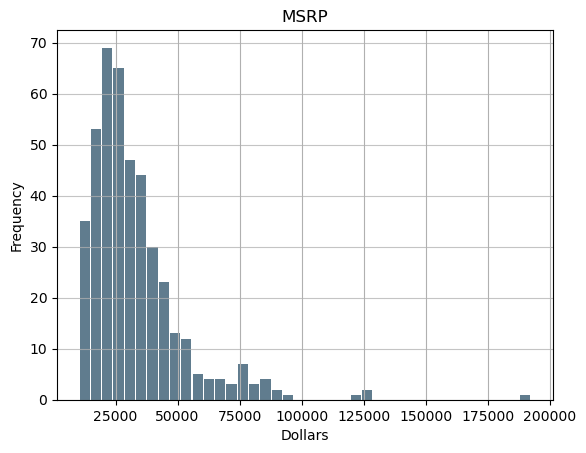

In [61]:
plt.title('MSRP')
plt.xlabel('Dollars')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
Cars_Data['msrp'].plot.hist(grid=True, bins=40, rwidth=0.9, color='#607c8e')

In [ ]:
#There is an obvious outlier in the dataset. I will later remove the car that is an outlier from the dataset.
#There is not enough data to create a model that applies to cars that are that expensive.
#It is more constructive to analyze the less expensive cars given the available data.

<Axes: title={'center': 'MSRP: Log Transformation'}, xlabel='Dollars', ylabel='Frequency'>

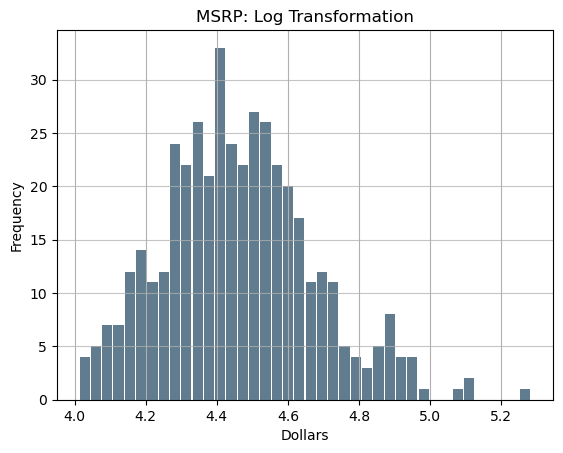

In [63]:
plt.title('MSRP: Log Transformation')
plt.xlabel('Dollars')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
LogCars=pd.DataFrame(np.log10(Cars_Data['msrp']))
LogCars['msrp'].plot.hist(grid=True, bins=40, rwidth=0.9, color='#607c8e')

In [ ]:
#Transforming the MSRP variable seems to prove it has a log-normal distribution

<Axes: title={'center': 'Dealer Cost'}, xlabel='Dollars', ylabel='Frequency'>

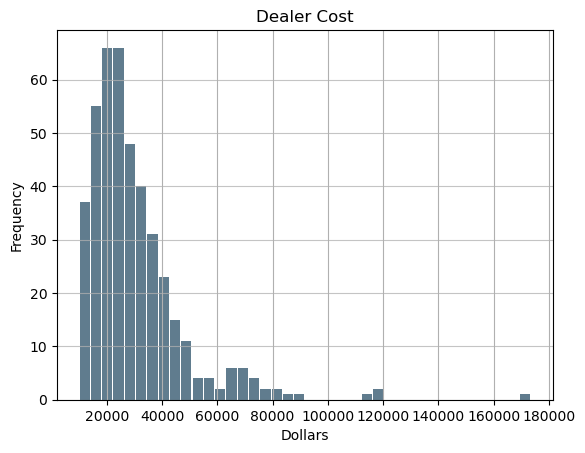

In [64]:
plt.title('Dealer Cost')
plt.xlabel('Dollars')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
Cars_Data['dealer_cost'].plot.hist(grid=True, bins=40, rwidth=0.9, color='#607c8e')

<Axes: xlabel='dealer_cost', ylabel='msrp'>

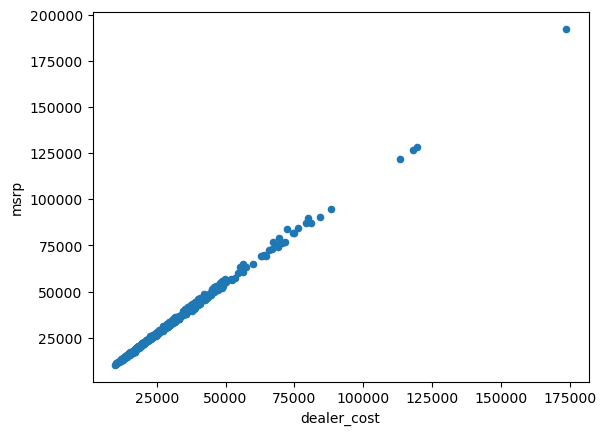

In [66]:
Cars_Data.plot.scatter(y='msrp',x='dealer_cost')

<Axes: title={'center': 'Engine Size'}, xlabel='Liters', ylabel='Frequency'>

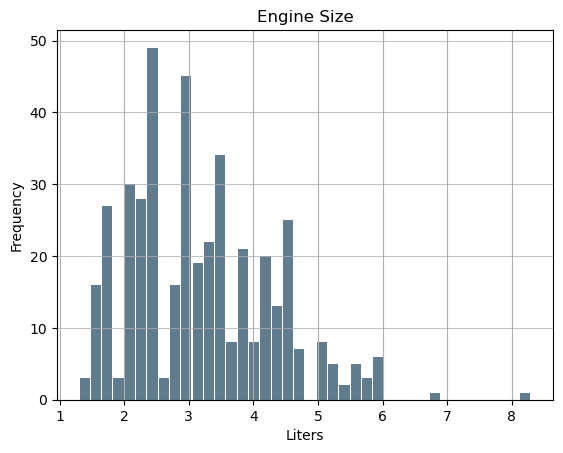

In [67]:
plt.title('Engine Size')
plt.xlabel('Liters')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
Cars_Data['eng_size'].plot.hist(grid=True, bins=40, rwidth=0.9, color='#607c8e')

<Axes: xlabel='eng_size', ylabel='msrp'>

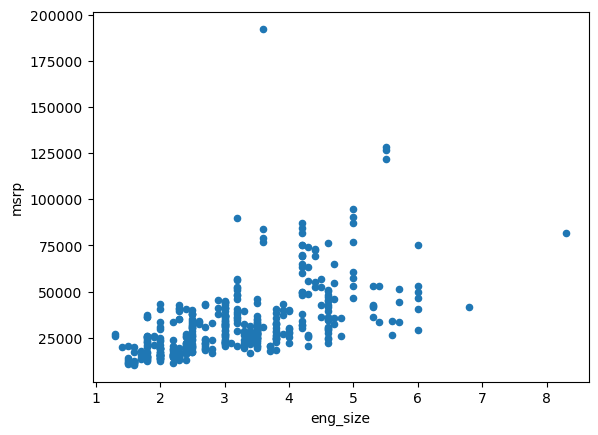

In [68]:
Cars_Data.plot.scatter(y='msrp',x='eng_size')

In [69]:
un_cylinders=[Cars_Data['ncyl'].unique()]

In [70]:
un_cylinders

[array([ 4,  6,  3,  8,  5, 12, 10, -1], dtype=int64)]

<Axes: title={'center': 'Engine Size'}, xlabel='Cylinders', ylabel='Frequency'>

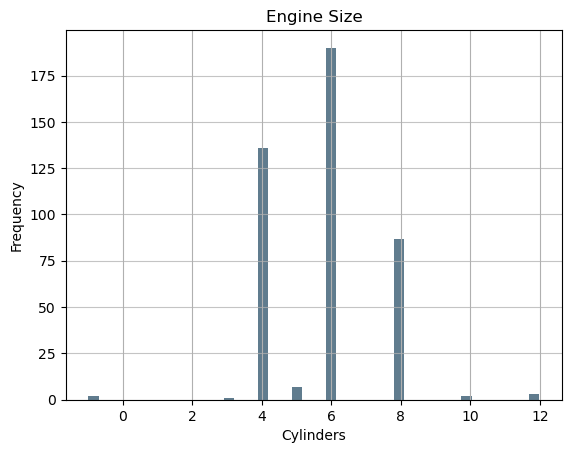

In [71]:
plt.title('Engine Size')
plt.xlabel('Cylinders')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
Cars_Data['ncyl'].plot.hist(grid=True, bins=40, rwidth=0.9, color='#607c8e')

<Axes: xlabel='ncyl', ylabel='msrp'>

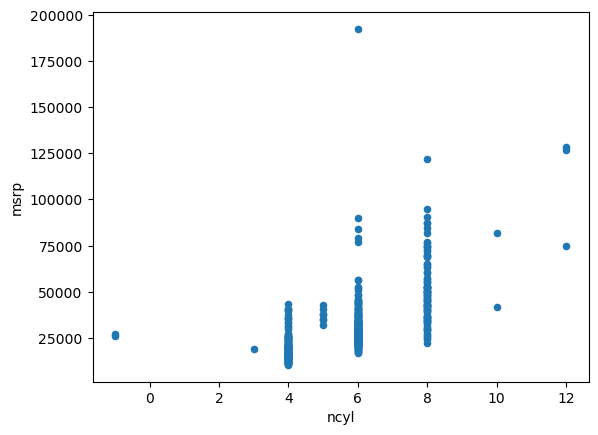

In [72]:
Cars_Data.plot.scatter(y='msrp',x='ncyl')

In [73]:
Oddball=Cars_Data[Cars_Data['ncyl']==-1]

In [74]:
Oddball.head()

,name,sports_car,suv,wagon,minivan,pickup,all_wheel,rear_wheel,msrp,dealer_cost,eng_size,ncyl,horsepwr,city_mpg,hwy_mpg,weight,wheel_base,length,width
271,Mazda RX-8 4dr automatic,True,False,False,False,False,False,True,25700,23794,1.3,-1,197,18.0,25.0,3053.0,106.0,174.0,NaN
272,Mazda RX-8 4dr manual,True,False,False,False,False,False,True,27200,25179,1.3,-1,238,18.0,24.0,3029.0,106.0,174.0,NaN


In [75]:
#Research shows the Mazda RX-8 (the car with -1 for the number of cylinders) uses a triangular rotor instead of cylinders

<Axes: title={'center': 'Horsepower'}, xlabel='Horses', ylabel='Frequency'>

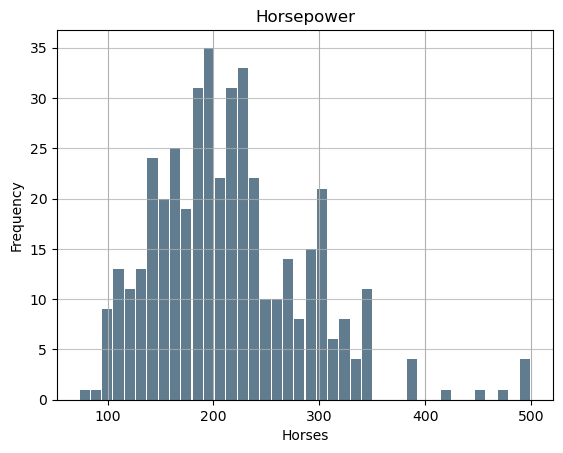

In [76]:
plt.title('Horsepower')
plt.xlabel('Horses')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
Cars_Data['horsepwr'].plot.hist(grid=True, bins=40, rwidth=0.9, color='#607c8e')

<Axes: title={'center': 'Horsepower: Log Transformation'}, xlabel='Dollars', ylabel='Frequency'>

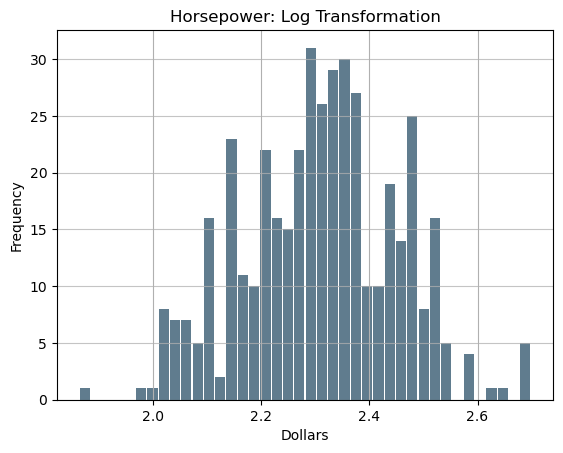

In [77]:
plt.title('Horsepower: Log Transformation')
plt.xlabel('Dollars')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
LogHpwr=pd.DataFrame(np.log10(Cars_Data['horsepwr']))
LogHpwr['horsepwr'].plot.hist(grid=True, bins=40, rwidth=0.9, color='#607c8e')

<Axes: xlabel='horsepwr', ylabel='msrp'>

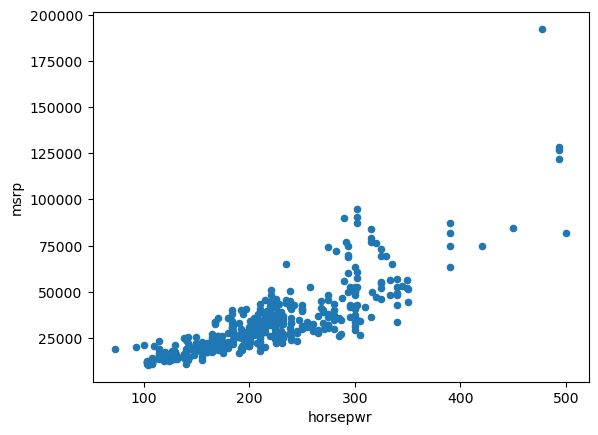

In [78]:
Cars_Data.plot.scatter(y='msrp',x='horsepwr')

<Axes: title={'center': 'City MPG'}, xlabel='MPG', ylabel='Frequency'>

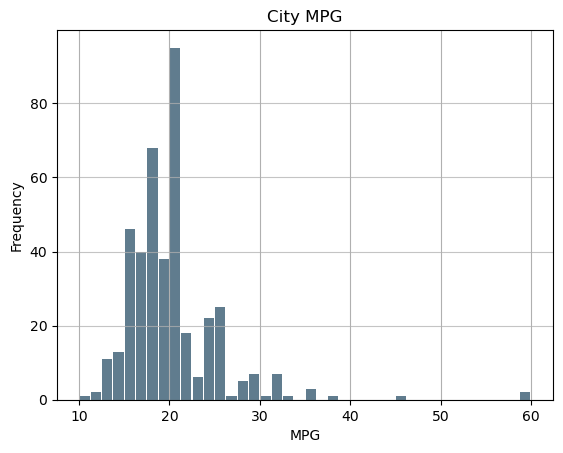

In [79]:
plt.title('City MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
Cars_Data['city_mpg'].plot.hist(grid=True, bins=40, rwidth=0.9, color='#607c8e')

In [ ]:
#There seems to be an outlier, a single car that has almost 60 mpg in the city. Removing the car may improve the model.

<Axes: title={'center': 'MPG: Log Transformation'}, xlabel='Dollars', ylabel='Frequency'>

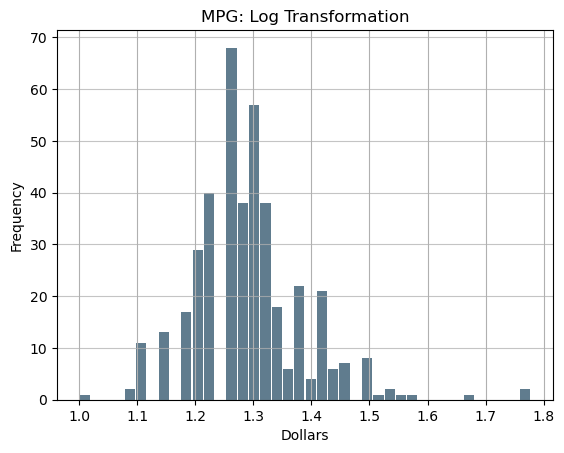

In [80]:
plt.title('MPG: Log Transformation')
plt.xlabel('Dollars')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
LogCity=pd.DataFrame(np.log10(Cars_Data['city_mpg']))
LogCity['city_mpg'].plot.hist(grid=True, bins=40, rwidth=0.9, color='#607c8e')

<Axes: xlabel='city_mpg', ylabel='msrp'>

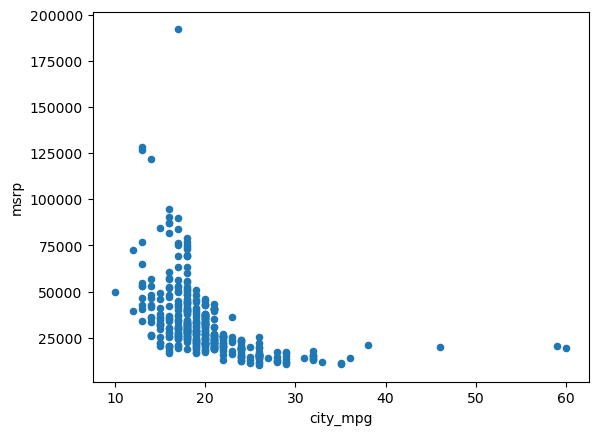

In [81]:
Cars_Data.plot.scatter(y='msrp',x='city_mpg')

<Axes: title={'center': 'Highway MPG'}, xlabel='MPG', ylabel='Frequency'>

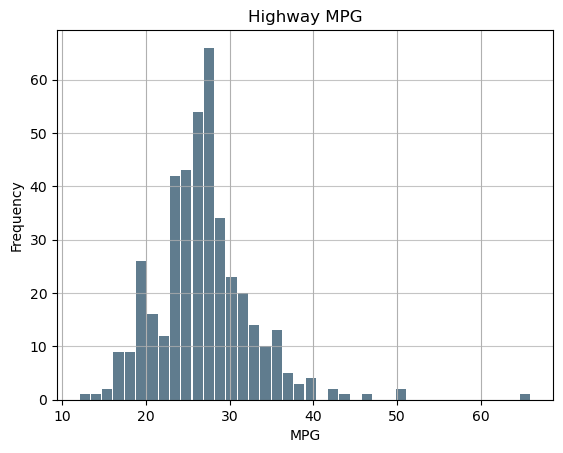

In [82]:
plt.title('Highway MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
Cars_Data['hwy_mpg'].plot.hist(grid=True, bins=40, rwidth=0.9, color='#607c8e')

<Axes: title={'center': 'MPG: Log Transformation'}, xlabel='Dollars', ylabel='Frequency'>

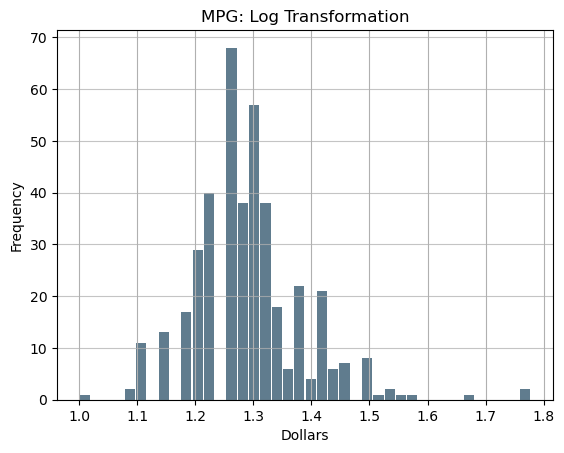

In [83]:
plt.title('MPG: Log Transformation')
plt.xlabel('Dollars')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
LogCity=pd.DataFrame(np.log10(Cars_Data['city_mpg']))
LogCity['city_mpg'].plot.hist(grid=True, bins=40, rwidth=0.9, color='#607c8e')

<Axes: xlabel='hwy_mpg', ylabel='msrp'>

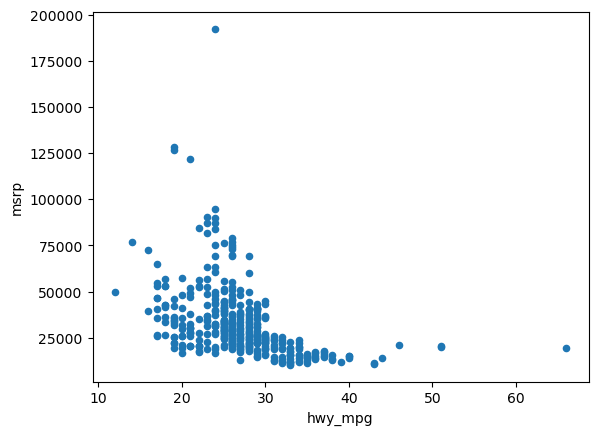

In [84]:
Cars_Data.plot.scatter(y='msrp',x='hwy_mpg')

In [85]:
Oddball=Cars_Data[Cars_Data['hwy_mpg']==66]

In [86]:
Oddball.head()

,name,sports_car,suv,wagon,minivan,pickup,all_wheel,rear_wheel,msrp,dealer_cost,eng_size,ncyl,horsepwr,city_mpg,hwy_mpg,weight,wheel_base,length,width
69,Honda Insight 2dr (gas/electric),False,False,False,False,False,False,False,19110,17911,2.0,3,73,60.0,66.0,1850.0,95.0,155.0,67.0


<Axes: title={'center': 'Weight'}, xlabel='Pounds', ylabel='Frequency'>

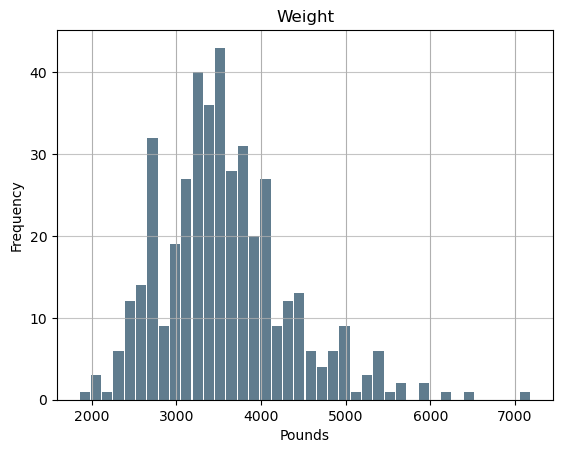

In [87]:
plt.title('Weight')
plt.xlabel('Pounds')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
Cars_Data['weight'].plot.hist(grid=True, bins=40, rwidth=0.9, color='#607c8e')

<Axes: xlabel='weight', ylabel='msrp'>

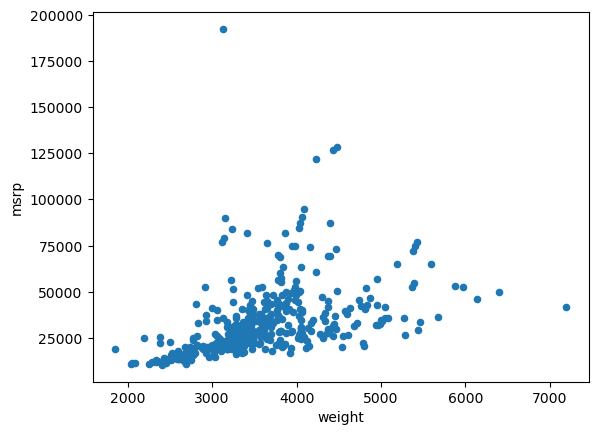

In [88]:
Cars_Data.plot.scatter(y='msrp',x='weight')

<Axes: title={'center': 'Wheel Base'}, xlabel='Inches', ylabel='Frequency'>

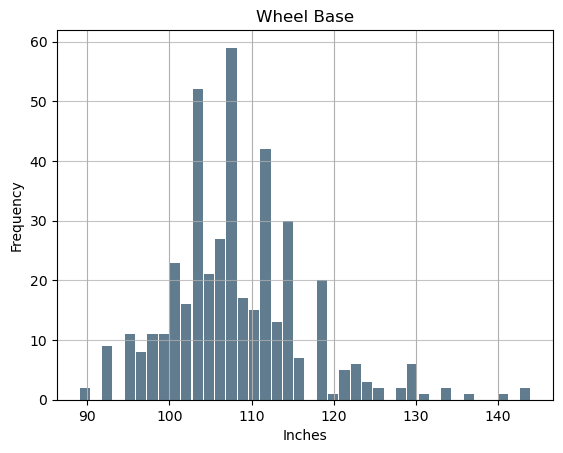

In [89]:
plt.title('Wheel Base')
plt.xlabel('Inches')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
Cars_Data['wheel_base'].plot.hist(grid=True, bins=40, rwidth=0.9, color='#607c8e')

<Axes: xlabel='wheel_base', ylabel='msrp'>

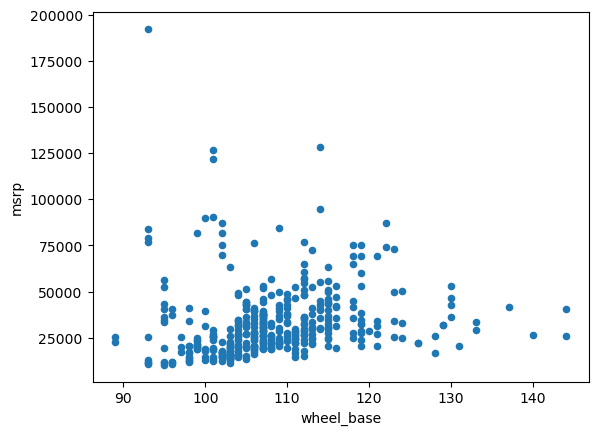

In [90]:
Cars_Data.plot.scatter(y='msrp',x='wheel_base')

<Axes: title={'center': 'Length'}, xlabel='Inches', ylabel='Frequency'>

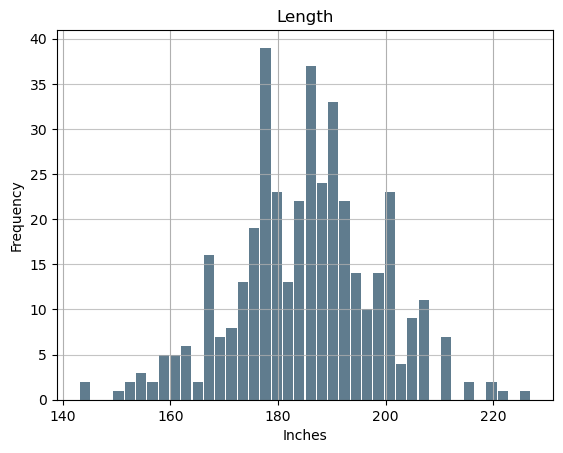

In [91]:
plt.title('Length')
plt.xlabel('Inches')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
Cars_Data['length'].plot.hist(grid=True, bins=40, rwidth=0.9, color='#607c8e')

<Axes: xlabel='length', ylabel='msrp'>

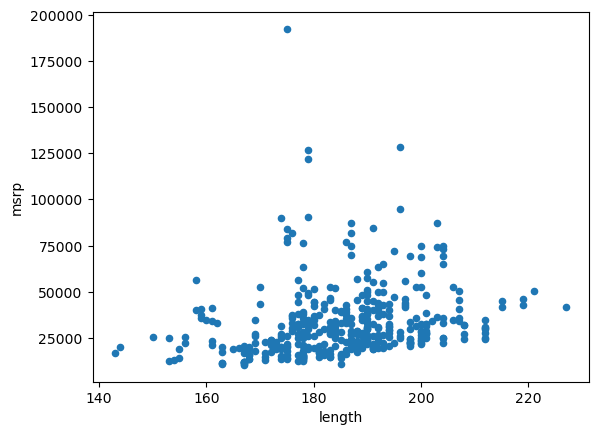

In [92]:
Cars_Data.plot.scatter(y='msrp',x='length')

<Axes: title={'center': 'Width'}, xlabel='Inches', ylabel='Frequency'>

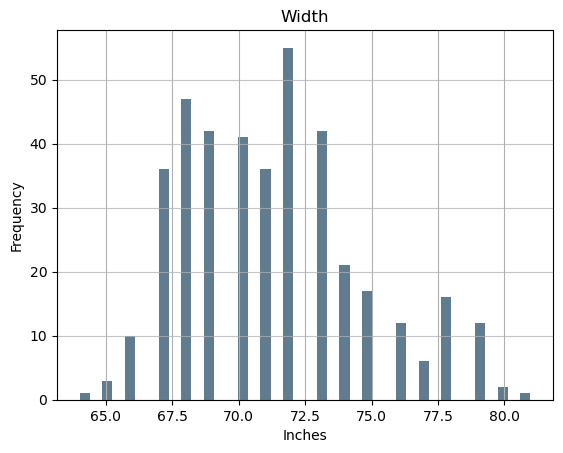

In [93]:
plt.title('Width')
plt.xlabel('Inches')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
Cars_Data['width'].plot.hist(grid=True, bins=40, rwidth=0.9, color='#607c8e')

<Axes: xlabel='width', ylabel='msrp'>

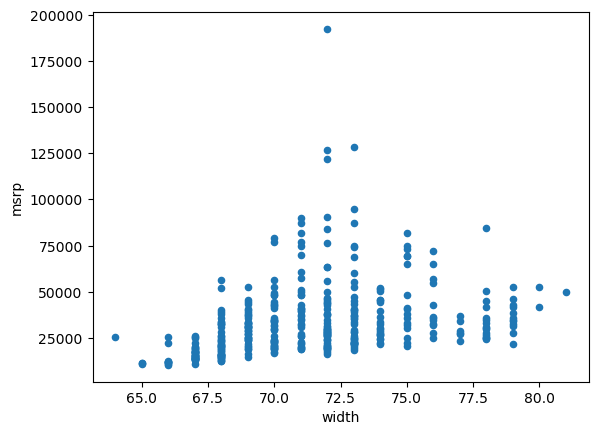

In [94]:
Cars_Data.plot.scatter(y='msrp',x='width')

In [95]:
pip install LinearRegression

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
import numpy as np

In [98]:
Cars_Data2=Cars_Data[Cars_Data.isnull().any(axis=1)]

In [99]:
Cars_Data2.head()

,name,sports_car,suv,wagon,minivan,pickup,all_wheel,rear_wheel,msrp,dealer_cost,eng_size,ncyl,horsepwr,city_mpg,hwy_mpg,weight,wheel_base,length,width
26,Mazda3 i 4dr,False,False,False,False,False,False,False,15500,14525,2.0,4,148,NaN,NaN,2696.0,NaN,NaN,NaN
28,Mitsubishi Lancer ES 4dr,False,False,False,False,False,False,False,14622,13751,2.0,4,120,NaN,NaN,2656.0,102.0,181.0,67.0
29,Mitsubishi Lancer LS 4dr,False,False,False,False,False,False,False,16722,15718,2.0,4,120,NaN,NaN,2795.0,102.0,181.0,67.0
73,Mazda3 s 4dr,False,False,False,False,False,False,False,17200,15922,2.3,4,160,NaN,NaN,2762.0,NaN,NaN,NaN
77,Mitsubishi Galant ES 2.4L 4dr,False,False,False,False,False,False,False,19312,17957,2.4,4,160,NaN,NaN,3351.0,108.0,191.0,72.0


In [100]:
Cars_Data3=Cars_Data[Cars_Data.isnull().any(axis=1)==False]

In [101]:
Cars_Data3

,name,sports_car,suv,wagon,minivan,pickup,all_wheel,rear_wheel,msrp,dealer_cost,eng_size,ncyl,horsepwr,city_mpg,hwy_mpg,weight,wheel_base,length,width
0,Chevrolet Aveo 4dr,False,False,False,False,False,False,False,11690,10965,1.6,4,103,28.0,34.0,2370.0,98.0,167.0,66.0
1,Chevrolet Aveo LS 4dr hatch,False,False,False,False,False,False,False,12585,11802,1.6,4,103,28.0,34.0,2348.0,98.0,153.0,66.0
2,Chevrolet Cavalier 2dr,False,False,False,False,False,False,False,14610,13697,2.2,4,140,26.0,37.0,2617.0,104.0,183.0,69.0
3,Chevrolet Cavalier 4dr,False,False,False,False,False,False,False,14810,13884,2.2,4,140,26.0,37.0,2676.0,104.0,183.0,68.0
4,Chevrolet Cavalier LS 2dr,False,False,False,False,False,False,False,16385,15357,2.2,4,140,26.0,37.0,2617.0,104.0,183.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,Oldsmobile Silhouette GL,False,False,False,True,False,False,False,28790,26120,3.4,6,185,19.0,26.0,3948.0,120.0,201.0,72.0
400,Pontiac Montana,False,False,False,True,False,False,False,23845,21644,3.4,6,185,19.0,26.0,3803.0,112.0,187.0,72.0
401,Pontiac Montana EWB,False,False,False,True,False,True,False,31370,28454,3.4,6,185,18.0,24.0,4431.0,121.0,201.0,72.0
402,Toyota Sienna CE,False,False,False,True,False,False,False,23495,21198,3.3,6,230,19.0,27.0,4120.0,119.0,200.0,77.0


In [102]:
#Initial model. Dealer Cost is excluded becuase it is too correlated with the dependant variable

In [103]:
Cars_Data3=Cars_Data3[Cars_Data3['msrp']<80000]

In [104]:
model = LinearRegression().fit(X=Cars_Data3.iloc[:, np.r_[1:7,8:18]], y=Cars_Data3['msrp'])

In [105]:
y, X = dmatrices('msrp~sports_car+suv+wagon+minivan+pickup+all_wheel+rear_wheel+eng_size+ncyl+horsepwr+city_mpg+hwy_mpg+weight+wheel_base+length+width', data=Cars_Data3, return_type='dataframe')

In [106]:
mod = sm.OLS(y, X)

In [107]:
res = mod.fit()

In [108]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   msrp   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     90.99
Date:                Thu, 27 Jul 2023   Prob (F-statistic):          2.96e-112
Time:                        00:16:33   Log-Likelihood:                -3818.0
No. Observations:                 375   AIC:                             7668.
Df Residuals:                     359   BIC:                             7731.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3.204e+04    1.3e+04      2.473      0.014    6558.123    5.75e+04
sports_car[T.True]  4477.8640   1662.287      2.694      0.007    1208.820    7746.908
suv[T.True]        -3150.4078   1668.852     -1.888      0.060   -6432.363     131.547
wagon[T.True]      -1079.9403   1334.146     -0.809      0.419   -3703.663    1543.783
minivan[T.True]     -822.3176   2009.237     -0.409      0.683   -4773.670    3129.035
pickup[T.True]      2.553e-10   1.02e-10      2.493      0.013    5.39e-11    4.57e-10
all_wheel[T.True]   1580.1242   1108.054      1.426      0.155    -598.969    3759.217
rear_wheel[T.True]  6728.7451   1107.128      6.078      0.000    4551.475    8906.016
eng_size           -3775.9803   1069.614     -3.530      0.000   -5879.476   -1672.484
ncyl                2491.9119    647.821      3.847      0.000    1217.911    3765.912
horsepwr             133.5379     11.444     11.669      0.000     111.032     156.044
city_mpg            -188.2365    230.625     -0.816      0.415    -641.782     265.309
hwy_mpg              791.0087    247.667      3.194      0.002     303.948    1278.069
weight                15.4051      1.570      9.811      0.000      12.317      18.493
wheel_base          -265.8771    137.213     -1.938      0.053    -535.719       3.965
length                26.4404     66.905      0.395      0.693    -105.135     158.016
width              -1145.4608    227.022     -5.046      0.000   -1591.920    -699.001
==============================================================================
Omnibus:                       55.558   Durbin-Watson:                   1.213
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.231
Skew:                           0.796   Prob(JB):                     1.57e-25
Kurtosis:                       5.186   Cond. No.                     9.12e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.86e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [109]:
#I suspect weight, length, wheel_base and width cause multicollinearity. 
#I need to verify and determine the appropriate variables for the model.

In [110]:
Cars_Data3['weight'].corr(Cars_Data3['wheel_base'])

0.7693942203731728

In [111]:
Cars_Data3['weight'].corr(Cars_Data3['length'])

0.6560197858338739

In [112]:
Cars_Data3['weight'].corr(Cars_Data3['width'])

0.8124118411768075

In [113]:
Cars_Data3['eng_size'].corr(Cars_Data3['ncyl'])

0.913795722726179

In [114]:
Cars_Data3['eng_size'].corr(Cars_Data3['horsepwr'])

0.7880432161232025

In [115]:
Cars_Data3['city_mpg'].corr(Cars_Data3['hwy_mpg'])

0.9396682110529497

In [116]:
Cars_Data3['horsepwr'].corr(Cars_Data3['hwy_mpg'])

-0.6693074781908083

In [117]:
Cars_Data3['eng_size'].corr(Cars_Data3['hwy_mpg'])

-0.702164988747969

In [118]:
y, X = dmatrices('msrp~sports_car+suv+wagon+minivan+pickup+all_wheel+rear_wheel+horsepwr+hwy_mpg+weight+length', data=Cars_Data3, return_type='dataframe')

In [119]:
mod = sm.OLS(y, X)

In [120]:
res = mod.fit()

In [121]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   msrp   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     116.9
Date:                Thu, 27 Jul 2023   Prob (F-statistic):          3.51e-107
Time:                        00:16:34   Log-Likelihood:                -3842.5
No. Observations:                 375   AIC:                             7707.
Df Residuals:                     364   BIC:                             7750.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.153e+04   8231.778     -1.400      0.162   -2.77e+04    4662.705
sports_car[T.True]  2153.2348   1545.951      1.393      0.165    -886.882    5193.352
suv[T.True]        -6669.0307   1602.888     -4.161      0.000   -9821.115   -3516.947
wagon[T.True]      -1423.4243   1406.954     -1.012      0.312   -4190.204    1343.355
minivan[T.True]    -6295.0667   1879.545     -3.349      0.001   -9991.197   -2598.936
pickup[T.True]     -1.024e-12   9.44e-13     -1.085      0.279   -2.88e-12    8.32e-13
all_wheel[T.True]   2123.6411   1161.505      1.828      0.068    -160.461    4407.744
rear_wheel[T.True]  6325.0833   1094.019      5.782      0.000    4173.692    8476.475
horsepwr             132.8826     10.677     12.446      0.000     111.886     153.879
hwy_mpg              476.4927    117.861      4.043      0.000     244.720     708.266
weight                11.4129      1.400      8.154      0.000       8.660      14.165
length              -211.5014     46.355     -4.563      0.000    -302.659    -120.343
==============================================================================
Omnibus:                       60.041   Durbin-Watson:                   1.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.034
Skew:                           0.766   Prob(JB):                     4.82e-35
Kurtosis:                       5.787   Cond. No.                     3.48e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.01e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [122]:
Cars_Data3['weight'].corr(Cars_Data3['length'])

0.6560197858338739

In [123]:
Cars_Data3['sports_car'].value_counts()

False    339
True      36
Name: sports_car, dtype: int64

In [124]:
Cars_Data3['suv'].value_counts()

False    316
True      59
Name: suv, dtype: int64

In [125]:
Cars_Data3['wagon'].value_counts()

False    346
True      29
Name: wagon, dtype: int64

In [126]:
Cars_Data3['minivan'].value_counts()

False    355
True      20
Name: minivan, dtype: int64

In [127]:
Cars_Data3['pickup'].value_counts()

False    375
Name: pickup, dtype: int64

In [128]:
Cars_Data3['all_wheel'].value_counts()

False    299
True      76
Name: all_wheel, dtype: int64

In [129]:
Cars_Data3['rear_wheel'].value_counts()

False    290
True      85
Name: rear_wheel, dtype: int64

In [206]:
y, X = dmatrices('msrp~sports_car+suv+wagon+minivan+all_wheel+rear_wheel+horsepwr+hwy_mpg+weight+length', data=Cars_Data3, return_type='dataframe')

In [207]:
mod = sm.OLS(y, X)

In [208]:
res = mod.fit()

In [209]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   msrp   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     116.9
Date:                Thu, 27 Jul 2023   Prob (F-statistic):          3.51e-107
Time:                        01:26:29   Log-Likelihood:                -3842.5
No. Observations:                 375   AIC:                             7707.
Df Residuals:                     364   BIC:                             7750.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.153e+04   8231.778     -1.400      0.162   -2.77e+04    4662.705
sports_car[T.True]  2153.2348   1545.951      1.393      0.165    -886.882    5193.352
suv[T.True]        -6669.0307   1602.888     -4.161      0.000   -9821.115   -3516.947
wagon[T.True]      -1423.4243   1406.954     -1.012      0.312   -4190.204    1343.355
minivan[T.True]    -6295.0667   1879.545     -3.349      0.001   -9991.197   -2598.936
all_wheel[T.True]   2123.6411   1161.505      1.828      0.068    -160.461    4407.744
rear_wheel[T.True]  6325.0833   1094.019      5.782      0.000    4173.692    8476.475
horsepwr             132.8826     10.677     12.446      0.000     111.886     153.879
hwy_mpg              476.4927    117.861      4.043      0.000     244.720     708.266
weight                11.4129      1.400      8.154      0.000       8.660      14.165
length              -211.5014     46.355     -4.563      0.000    -302.659    -120.343
==============================================================================
Omnibus:                       60.041   Durbin-Watson:                   1.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.034
Skew:                           0.766   Prob(JB):                     4.82e-35
Kurtosis:                       5.787   Cond. No.                     8.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [210]:
#Create a Q-Q Plot to test if the residuals are normally distributed

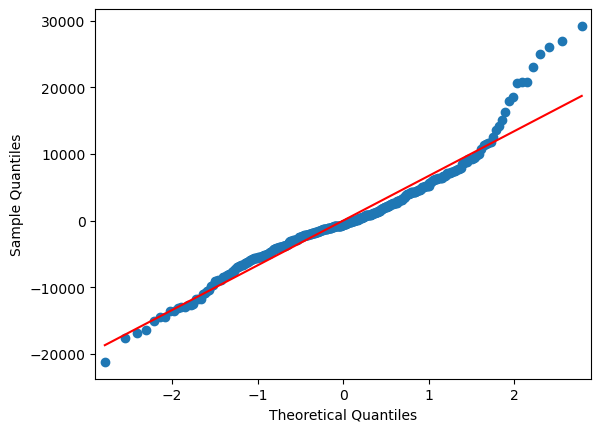

In [211]:
fig = sm.qqplot(res.resid, line='r')
plt.show()

In [212]:
#The residuals seem to be close to normal with some outliers at the upper and lower end. 

In [213]:
residuals=pd.DataFrame(res.resid)

In [214]:
fitted=pd.DataFrame(res.fittedvalues)

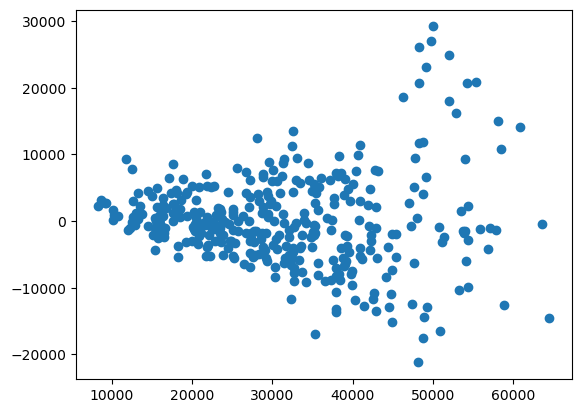

In [215]:
plt.scatter(y=residuals[0],x=fitted[0])

In [ ]:
#The model is clearly hetereoskedastic, error variance increases as the predicted values increase

In [216]:
#Since the variable msrp is logarithmic, I will next create a log-normal model to see if it solves these issues

In [217]:
Cars_Data_Log=Cars_Data3

In [218]:
Cars_Data_Log['log_msrp']=np.log(Cars_Data_Log['msrp'])

C:\Users\Andrew\AppData\Local\Temp\ipykernel_22516\3130378088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cars_Data_Log['log_msrp']=np.log(Cars_Data_Log['msrp'])


In [219]:
y, X = dmatrices('log_msrp~sports_car+suv+wagon+minivan+all_wheel+rear_wheel+horsepwr+hwy_mpg+weight+length', data=Cars_Data_Log, return_type='dataframe')

In [220]:
mod = sm.OLS(y, X)

In [221]:
res_log = mod.fit()

In [222]:
res_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_msrp   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     163.5
Date:                Thu, 27 Jul 2023   Prob (F-statistic):          4.93e-128
Time:                        01:26:42   Log-Likelihood:                 97.304
No. Observations:                 375   AIC:                            -172.6
Df Residuals:                     364   BIC:                            -129.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              8.9111      0.225     39.559      0.000       8.468       9.354
sports_car[T.True]     0.0869      0.042      2.054      0.041       0.004       0.170
suv[T.True]           -0.2593      0.044     -5.912      0.000      -0.346      -0.173
wagon[T.True]         -0.0336      0.039     -0.872      0.384      -0.109       0.042
minivan[T.True]       -0.1816      0.051     -3.530      0.000      -0.283      -0.080
all_wheel[T.True]      0.0761      0.032      2.393      0.017       0.014       0.139
rear_wheel[T.True]     0.1751      0.030      5.848      0.000       0.116       0.234
horsepwr               0.0037      0.000     12.795      0.000       0.003       0.004
hwy_mpg                0.0074      0.003      2.308      0.022       0.001       0.014
weight                 0.0004   3.83e-05      9.807      0.000       0.000       0.000
length                -0.0053      0.001     -4.198      0.000      -0.008      -0.003
==============================================================================
Omnibus:                        0.949   Durbin-Watson:                   1.083
Prob(Omnibus):                  0.622   Jarque-Bera (JB):                0.853
Skew:                          -0.116   Prob(JB):                        0.653
Kurtosis:                       3.025   Cond. No.                     8.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

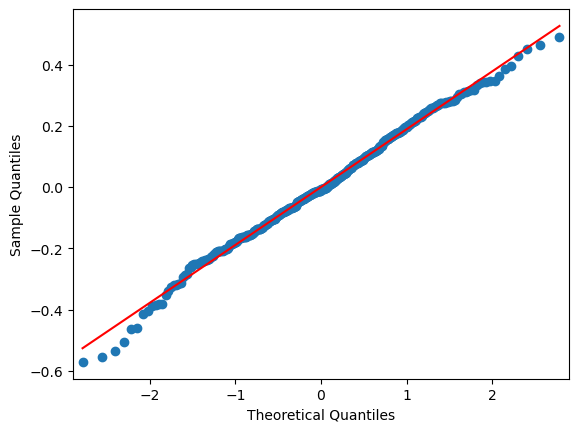

In [227]:
fig = sm.qqplot(res_log.resid, line='r')
plt.show()

In [ ]:
#The residuals are closer to normal now that the model has been changed

In [224]:
residuals_log=pd.DataFrame(res_log.resid)

In [225]:
fitted_log=pd.DataFrame(res_log.fittedvalues)

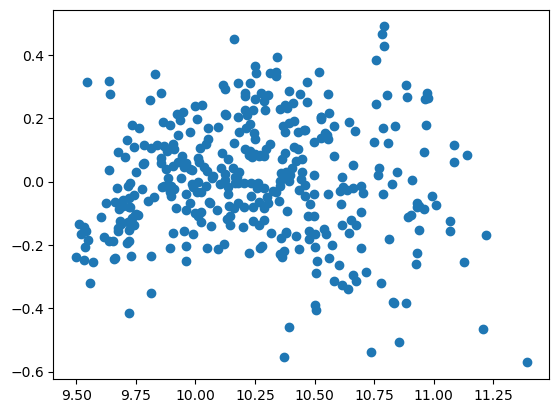

In [226]:
plt.scatter(y=residuals_log[0],x=fitted_log[0])

In [ ]:
#The model with the log transformation is now hetereoskedastic

In [ ]:
#Transforming the dependant variable seems to create a much better model